<a href="https://colab.research.google.com/github/nikishkaaa/Intelligent_data_analysis-UNI/blob/main/IAD_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import  SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [3]:
dataset_url = 'https://www.kaggle.com/c/titanic/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darianikishkina
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 12.1MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


In [4]:
os.listdir("./titanic")

['train.csv', 'test.csv', 'gender_submission.csv']

In [5]:
df = pd.read_csv('./titanic/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

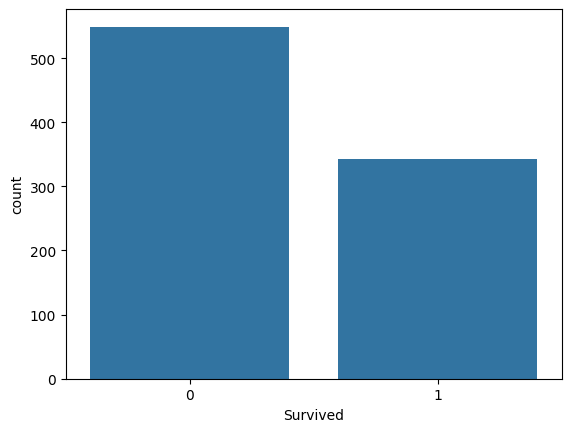

In [8]:
sns.countplot(x='Survived', data=df)

## Preprocessing

In [9]:
X = df.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = df['Survived']

In [10]:
cat_columns = X.select_dtypes(include='object').columns.tolist()
num_columns = X.select_dtypes(exclude='object').columns.tolist()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [12]:
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)


categorical_tarnsformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('onehot', OneHotEncoder(sparse_output = False, handle_unknown='ignore'))
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_columns),
        ('cat', categorical_tarnsformer, cat_columns)
    ]
)

In [13]:
pipeline = Pipeline (
    steps=[
        ('proc', preprocessor),
        ('gaus', GaussianNB())
    ]
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_train)
predict_proba = pipeline.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       439
           1       0.92      1.00      0.96       273

    accuracy                           0.97       712
   macro avg       0.96      0.97      0.96       712
weighted avg       0.97      0.97      0.97       712



In [14]:
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9662921348314607

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       439
           1       0.92      1.00      0.96       273

    accuracy                           0.97       712
   macro avg       0.96      0.97      0.96       712
weighted avg       0.97      0.97      0.97       712

Accuracy =  0.9662921348314607
Area under ROC score on  dataset: 0.97%


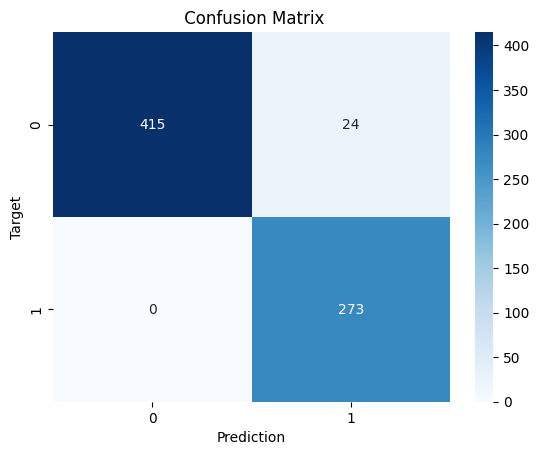

              precision    recall  f1-score   support

           0       0.63      0.17      0.27       110
           1       0.39      0.84      0.53        69

    accuracy                           0.43       179
   macro avg       0.51      0.51      0.40       179
weighted avg       0.54      0.43      0.37       179

Accuracy =  0.4301675977653631
Area under ROC score on  dataset: 0.51%


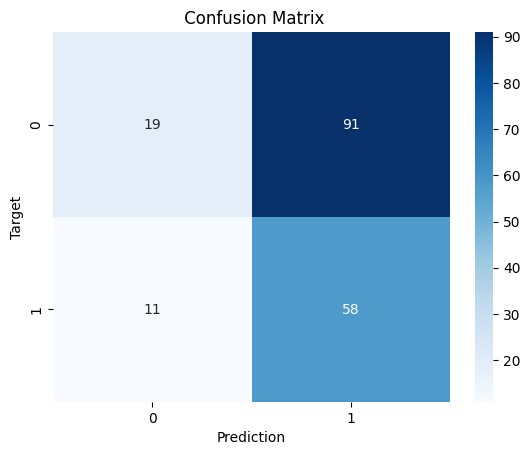

In [15]:
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict_proba(inputs)[:, 1]
    fpr, tpr, thresholds = roc_curve(targets, preds)
    print(classification_report(targets, preds))
    print("Accuracy = ", accuracy_score(targets, preds))
    roc_auc = auc(fpr, tpr)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    preds_for_matrix = model_pipeline.predict(inputs)
    confusion_matrix_ = confusion_matrix(targets, preds_for_matrix)
    plt.figure()
    sns.heatmap(confusion_matrix_, fmt='d', annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

train_preds = predict_and_plot(pipeline, X_train, y_train)
val_preds = predict_and_plot(pipeline, X_test, y_test)

Висновок: модель перенавчилась

### Налаштування моделі за допомогою GridSearchCV

In [16]:
param_grid = {
    'gaus__var_smoothing': np.logspace(0, -9, num=10)
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best params:", grid_search.best_params_)
print("Best result (ROC AUC):", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc_test_score = roc_auc_score(y_test, y_pred_proba)
print("Test score (ROC AUC):", roc_auc_test_score)

Best params: {'gaus__var_smoothing': 0.1}
Best result (ROC AUC): 0.8473576411977666
Test score (ROC AUC): 0.8225296442687746


Висновок: з параметром gaus__var_smoothing': 0.1 модель показує набагато кращі результати. Зовсім маленька різниця між train i test score говорить про те, що модель добре генералізується на нових даних